In [42]:
import pymysql
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

userName = 'sqluser'
userPass = 'password'

In [55]:
conn=pymysql.connect(host='localhost',port=int(3306), user=userName, passwd=userPass, db='airline')
tableNames = pd.read_sql_query('Show Tables', conn)
print(tableNames)

                     Tables_in_airline
0                  airportcode_weather
1                         l_airline_id
2                            l_airport
3                         l_airport_id
4                     l_airport_seq_id
5                       l_cancellation
6                     l_city_market_id
7                          l_deparrblk
8                 l_distance_group_250
9                         l_diversions
10                            l_months
11               l_ontime_delay_groups
12                          l_quarters
13                l_state_abr_aviation
14                        l_state_fips
15                   l_unique_carriers
16                          l_weekdays
17                  l_world_area_codes
18                        l_yesno_resp
19  on_time_on_time_performance_2016_1


### Read in database main table on_time_on_time_performance_2016_1:

In [44]:
airline_flights_table = pd.read_sql_query('SELECT * FROM on_time_on_time_performance_2016_1', conn)
airline_flights_table.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN


### Read in weather csv file:

In [3]:
Weather_df = pd.read_csv('WeatherUS_2016.csv')
Weather_df.sample(5)

#Airports_df = pd.read_csv('Airports.csv')
#Airports_df.sample(5)

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
397692,2540273,W-2573433,Snow,Light,2016-12-26 16:38:00,2016-12-26 17:19:00,0.07,US/Central,KBDE,48.7261,-94.6121,Baudette,Lake of the Woods,MN,56623.0
1025132,6488400,W-6573263,Rain,Light,2016-09-05 16:55:00,2016-09-05 21:50:00,0.00,US/Central,KCWF,30.2106,-93.1432,Lake Charles,Calcasieu,LA,70615.0
669779,4261826,W-4317401,Snow,Light,2016-11-20 01:05:00,2016-11-20 01:17:00,0.02,US/Eastern,KIPT,41.2430,-76.9217,Montoursville,Lycoming,PA,17754.0
615057,3911302,W-3961863,Fog,Moderate,2016-04-11 10:35:00,2016-04-11 10:55:00,0.00,US/Eastern,KMZZ,40.4899,-85.6797,Marion,Grant,IN,46953.0
522322,3313045,W-3356030,Fog,Severe,2016-05-10 12:35:00,2016-05-10 14:15:00,0.00,US/Central,KBEA,28.3692,-97.7953,Beeville,Bee,TX,78102.0


In [4]:
Weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [ ]:
Weather_df.isna().sum()

Unnamed: 0              0
EventId                 0
Type                    0
Severity                0
StartTime               0
EndTime                 0
Precipitation(in)       0
TimeZone                0
AirportCode             0
LocationLat             0
LocationLng             0
City                 1530
County                  0
State                   0
ZipCode              8497
dtype: int64

In [ ]:
Weather_df.shape

(1185991, 15)

In [ ]:
Weather_df.tail()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
1185986,7476860,W-7574893,Snow,Light,2016-12-25 18:00:00,2016-12-25 18:30:00,0.01,US/Mountain,BVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185987,7476861,W-7574894,Snow,Moderate,2016-12-25 18:30:00,2016-12-25 20:16:00,0.12,US/Mountain,BVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185988,7476862,W-7574895,Snow,Light,2016-12-25 20:16:00,2016-12-26 00:53:00,0.16,US/Mountain,BVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185989,7476863,W-7574896,Snow,Light,2016-12-31 07:53:00,2016-12-31 08:22:00,0.00,US/Mountain,BVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185990,7476864,W-7574897,Fog,Severe,2016-12-31 16:10:00,2016-12-31 16:24:00,0.00,US/Mountain,BVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


In [ ]:
airline_flights_table['OriginCityName'].isnull().sum()

0

In [ ]:
Weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime,EndTime,Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [ ]:
Weather_df [Weather_df ['EventId'] == 'W-1']

,Unnamed: 0,EventId,Type,Severity,StartTime,EndTime,Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [ ]:
Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185991 entries, 0 to 1185990
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1185991 non-null  int64  
 1   EventId            1185991 non-null  object 
 2   Type               1185991 non-null  object 
 3   Severity           1185991 non-null  object 
 4   StartTime          1185991 non-null  object 
 5   EndTime            1185991 non-null  object 
 6   Precipitation(in)  1185991 non-null  float64
 7   TimeZone           1185991 non-null  object 
 8   AirportCode        1185991 non-null  object 
 9   LocationLat        1185991 non-null  float64
 10  LocationLng        1185991 non-null  float64
 11  City               1184461 non-null  object 
 12  County             1185991 non-null  object 
 13  State              1185991 non-null  object 
 14  ZipCode            1177494 non-null  float64
dtypes: float64(4), int64(1), object(

### Drop the K in airport codes for Weather dataframe:

In [ ]:
#dropping K values in front of the Airport Code Column

Weather_df['AirportCode'] = Weather_df['AirportCode'].str[1:]

Weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


### Clean up Column names in Weather dataframe:

In [ ]:
Weather_df.rename(columns = {'StartTime(UTC)':'StartTime','EndTime(UTC)':'EndTime'}, inplace = True)


### Create Table Schema and Insert data for Weather Table in SQL database:

In [80]:
#Connect to Database
#con = sqlite3.connect('airline') 
cur = conn.cursor()

# Create Table

cur.execute('CREATE TABLE AirportCode_Weather(EventID INT, WeatherDate_start DATE, WeatherDate_end DATE, Airport_id VARCHAR(6), CityName VARCHAR(30), StateName VARCHAR(2), weather_type VARCHAR(30), weather_severity VARCHAR(20), CONSTRAINT weatherEvent PRIMARY KEY (EventID))')
conn.commit()

In [81]:
# Insert data from csv into new table on certain columns:
# Insert Dataframe into SQL Server:

for index, row in Weather_df2.iterrows():
     cur.execute("INSERT INTO AirportCode_Weather (EventID, WeatherDate_start, WeatherDate_end, Airport_id, CityName, StateName, weather_type, weather_severity) values(%s,%s,%s,%s,%s,%s,%s,%s)", 
     (index, row.StartTime, row.EndTime, row.AirportCode, row.City, row.State, row.Type, row.Severity))

conn.commit()
cur.close()

### Clean up the AirportCode/City table 'l_airport':

In [45]:
#airportCode_city_query=('SELECT aw.Airport_id, a.Origin, a.OriginCityName, a.OriginState FROM airportcode_weather AS aw JOIN on_time_on_time_performance_2016_1 AS a ON SUBSTRING(Airport_id, 2) = a.Origin;')
#airportCode_City_table = pd.read_sql_query(airportCode_city_query, conn)
#airportCode_City_table.head()
airport_codes_table = pd.read_sql_query('SELECT * FROM l_airport', conn)
airport_codes_table.head()


,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"
3,05A,"Little Squaw, AK: Little Squaw Airport"
4,06A,"Kizhuyak, AK: Kizhuyak Bay"


In [59]:
#weather_dates = pd.read_sql_query('SELECT WeatherDate_start FROM airportcode_weather WHERE WeatherDate_start LIKE ''2016-01%''', conn)
#weather_dates.head()


In [46]:
airport_codes_table[['City_State', 'Airport']] = airport_codes_table['Description'].str.split(':', expand=True)
airport_codes_table= airport_codes_table.drop('Description', axis=1)
airport_codes_table[['City', 'State']] = airport_codes_table['City_State'].str.split(',', n=1, expand=True)
airport_codes_table= airport_codes_table.drop('City_State', axis=1)


In [47]:
#Weather_df2.to_dict(orient='dict', into=<class 'dict'>)
airport_codes_table.head()

,Code,Airport,City,State
0,01A,Afognak Lake Airport,Afognak Lake,AK
1,03A,Bear Creek Mining Strip,Granite Mountain,AK
2,04A,Lik Mining Camp,Lik,AK
3,05A,Little Squaw Airport,Little Squaw,AK
4,06A,Kizhuyak Bay,Kizhuyak,AK


In [58]:
airline_flights_table.shape

(445827, 83)

### Visuals:

<AxesSubplot:>

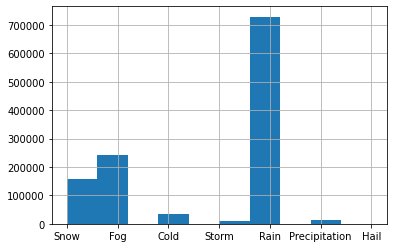

In [48]:
Weather_df["Type"].hist()